Saving Test.csv to Test (1).csv


/tmp/ipython-input-2212327641.py:14: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Test.csv')


Initial shape: (929615, 24)
Initial missing values:
 fecha_dato                    0
ncodpers                      0
ind_empleado                  0
pais_residencia               0
sexo                          5
age                           0
fecha_alta                    0
ind_nuevo                     0
antiguedad                    0
indrel                        0
ult_fec_cli_1t           927932
indrel_1mes                  23
tiprel_1mes                  23
indresi                       0
indext                        0
conyuemp                 929511
canal_entrada              2081
indfall                       0
tipodom                       0
cod_prov                   3996
nomprov                    3996
ind_actividad_cliente         0
renta                         0
segmento                   2248
dtype: int64


/tmp/ipython-input-2212327641.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


Shape after cleaning: (929615, 24)
Missing values after cleaning:
 fecha_dato               0
ncodpers                 0
ind_empleado             0
pais_residencia          0
sexo                     0
age                      0
fecha_alta               0
ind_nuevo                0
antiguedad               0
indrel                   0
ult_fec_cli_1t           0
indrel_1mes              0
tiprel_1mes              0
indresi                  0
indext                   0
conyuemp                 0
canal_entrada            0
indfall                  0
tipodom                  0
cod_prov                 0
nomprov                  0
ind_actividad_cliente    0
renta                    0
segmento                 0
dtype: int64
Cleaned_Test.csv saved successfully!


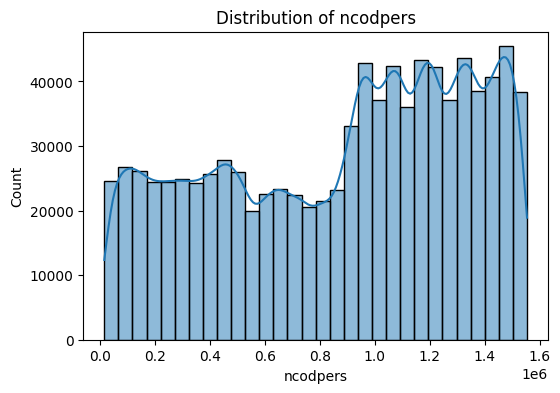

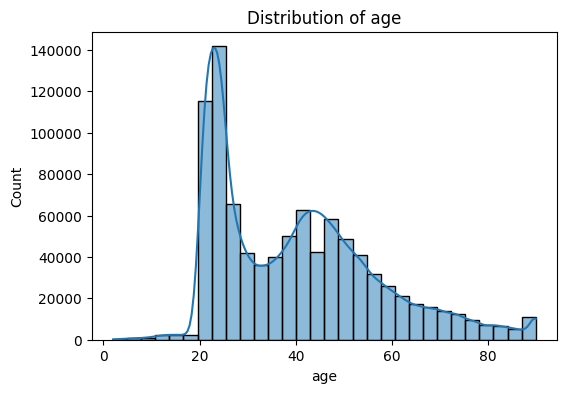

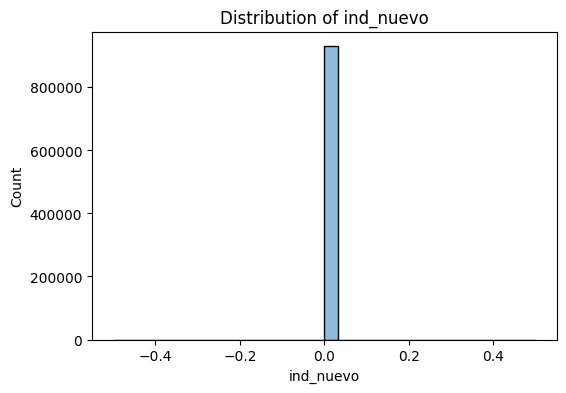

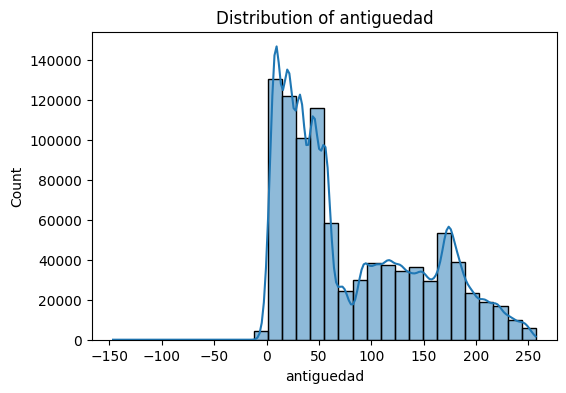

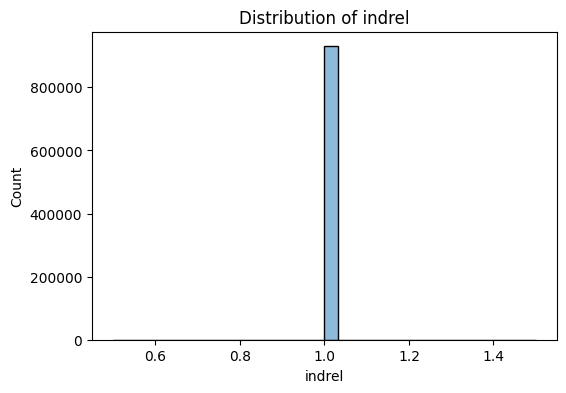

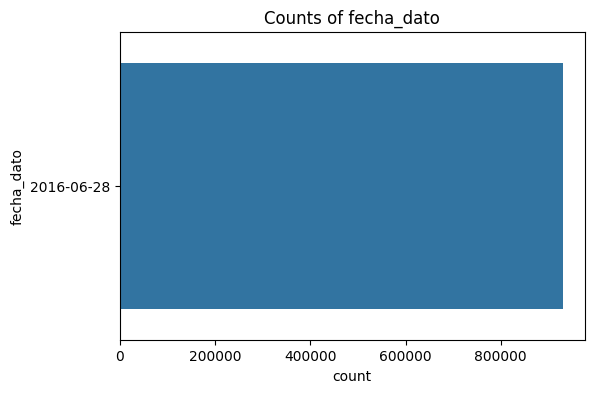

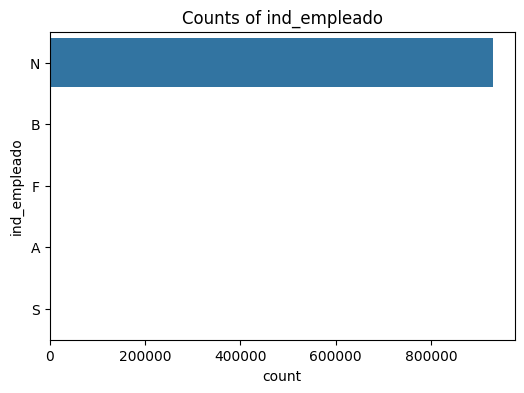

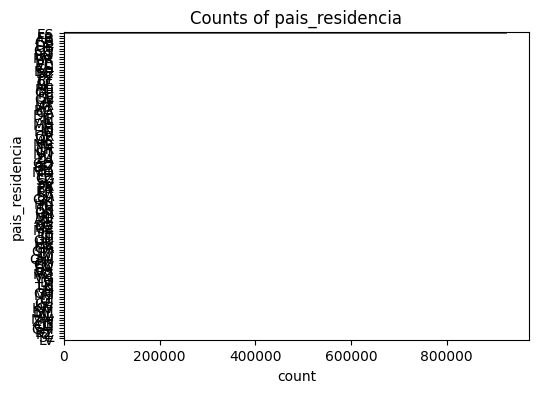

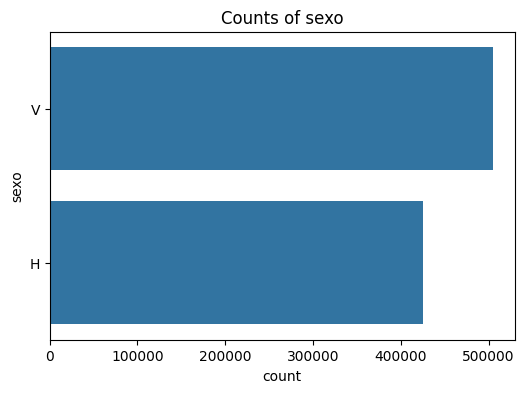

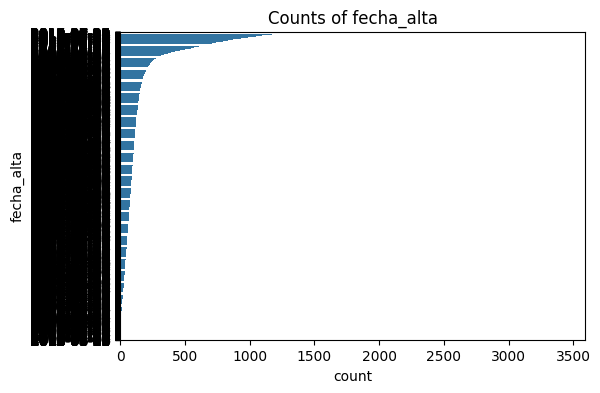

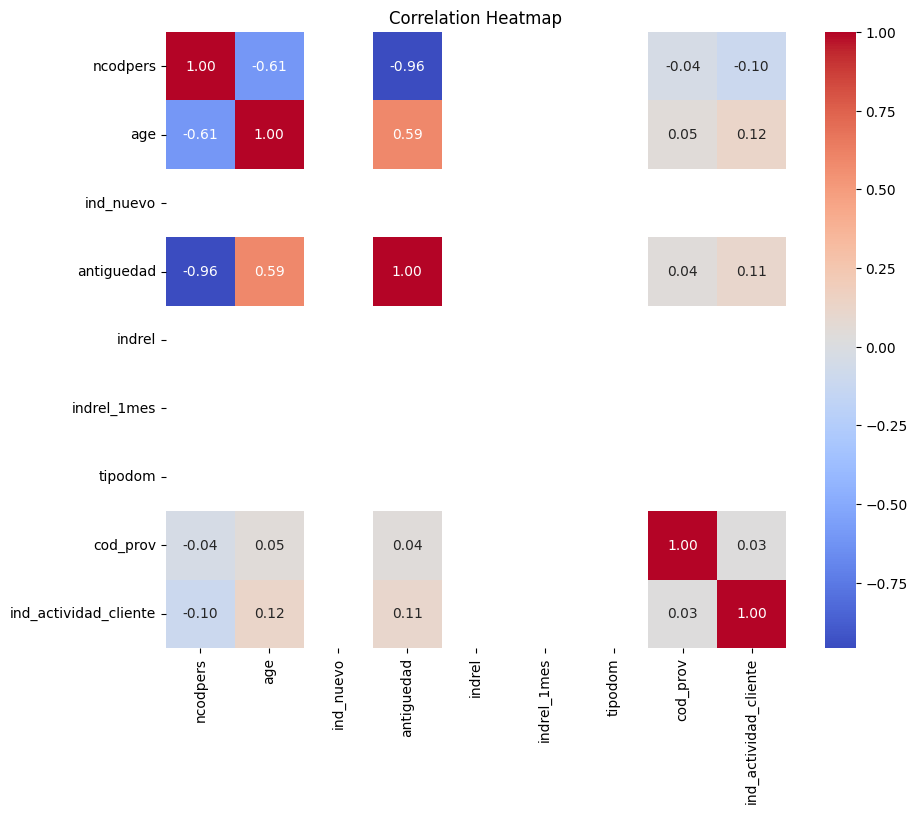

In [2]:
# Week 12: Data Cleaning, Transformation, and EDA on Test.csv

# 1. Import libraries
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Upload Test.csv from your computer
uploaded = files.upload()

# 3. Load Test.csv
df = pd.read_csv('Test.csv')

# 4. Basic info
print("Initial shape:", df.shape)
print("Initial missing values:\n", df.isnull().sum())

# 5. Data Cleaning Techniques

# Technique 1: Fill numeric missing values with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Technique 2: Fill categorical missing values with mode
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Handle outliers using IQR (cap extreme values)
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# 6. Final info after cleaning
print("Shape after cleaning:", df.shape)
print("Missing values after cleaning:\n", df.isnull().sum())

# 7. Save cleaned data
df.to_csv('Cleaned_Test.csv', index=False)
print("Cleaned_Test.csv saved successfully!")

# 8. Exploratory Data Analysis (EDA)

# Example plots for numeric features
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols[:5]:  # show first 5 numeric columns
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Example plots for categorical features
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols[:5]:  # show first 5 categorical columns
    plt.figure(figsize=(6,4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Counts of {col}')
    plt.show()

# 9. Correlation heatmap for numeric features
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 10. Save EDA figures (optional)
# You can uncomment to save figures locally
# plt.savefig('eda_plot.png')
